In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Importing the dataset 
DATAPATH = 'AirQuality.csv' #To Specify the file path for the air quality data.

data = pd.read_csv(DATAPATH, sep=';')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [14]:
data.dropna(axis=1, how='all', inplace=True) # Drop columns with all NaN values

In [15]:
data.dropna(axis=0, how='all', inplace=True) # Drop rows with all NaN values

In [5]:
for col in data.iloc[:,2:].columns: #To Convert numerical columns of the string typ to float
    if data[col].dtypes == object:
        data[col] = data[col].str.replace(',', '.').astype('float')

In [6]:
def positive_average(num): 
    return num[num > -200].mean()
    
daily_data = data.drop('Time', axis=1).groupby('Date').apply(positive_average)

In [7]:
#To demonstrate the 'daily_data' initial few rows.
daily_data.head() 

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
01/01/2005,2.134783,1114.250000,NaN,7.183333,853.791667,311.181818,782.458333,128.409091,1032.625000,1226.416667,6.870833,50.795833,0.498971
01/02/2005,2.866667,1250.166667,NaN,11.987500,1016.583333,502.000000,644.791667,162.956522,1184.416667,1559.083333,6.625000,51.741667,0.504188
01/03/2005,1.020833,820.166667,NaN,2.933333,618.916667,182.695652,1191.833333,99.434783,699.083333,482.708333,1.433333,35.104167,0.240004
01/04/2004,2.550000,1244.380952,310.125,11.971429,1010.428571,161.304348,880.666667,96.739130,1644.380952,1155.857143,15.519048,51.133333,0.854881
01/04/2005,1.108696,903.291667,NaN,3.412500,663.000000,161.833333,946.875000,107.333333,943.250000,523.958333,15.929167,35.962500,0.636529


In [8]:
daily_data.isna().sum() > 8 # Checking the missing values in any column of daily data that is more than 8

CO(GT)            True
PT08.S1(CO)      False
NMHC(GT)          True
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)           True
PT08.S3(NOx)     False
NO2(GT)           True
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [16]:
#To choose columns with missing values less than equal to 8 
daily_data = daily_data.iloc[:,(daily_data.isna().sum() <= 8).values]
daily_data.head()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,
01/01/2005,1114.250000,7.183333,853.791667,782.458333,1032.625000,1226.416667,6.870833,50.795833,0.498971
01/02/2005,1250.166667,11.987500,1016.583333,644.791667,1184.416667,1559.083333,6.625000,51.741667,0.504188
01/03/2005,820.166667,2.933333,618.916667,1191.833333,699.083333,482.708333,1.433333,35.104167,0.240004
01/04/2004,1244.380952,11.971429,1010.428571,880.666667,1644.380952,1155.857143,15.519048,51.133333,0.854881
01/04/2005,903.291667,3.412500,663.000000,946.875000,943.250000,523.958333,15.929167,35.962500,0.636529


In [10]:
daily_data = daily_data.dropna()

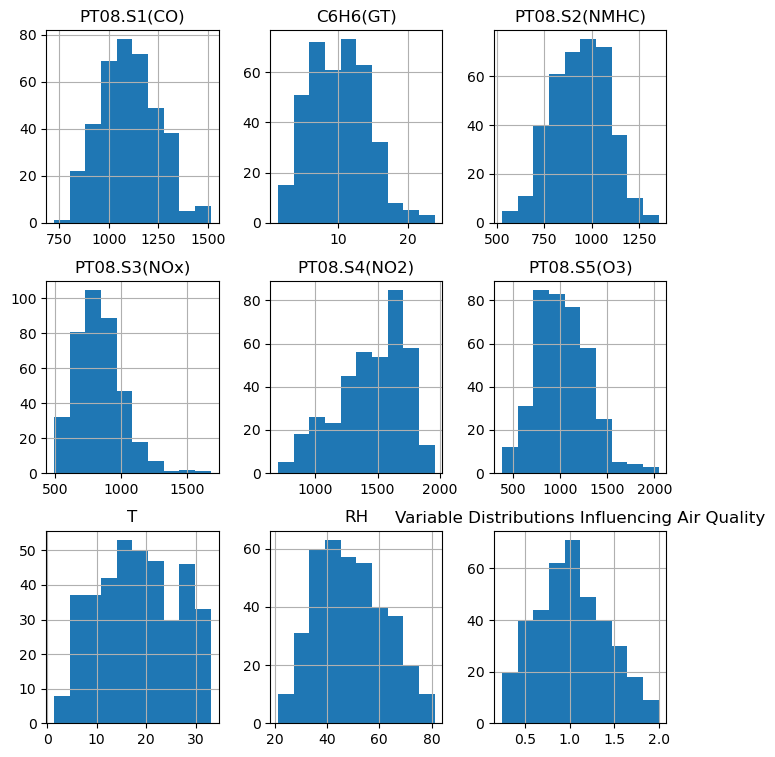

In [11]:
daily_data.hist(figsize=(8, 9))
plt.title("Variable Distributions Influencing Air Quality")
plt.show()

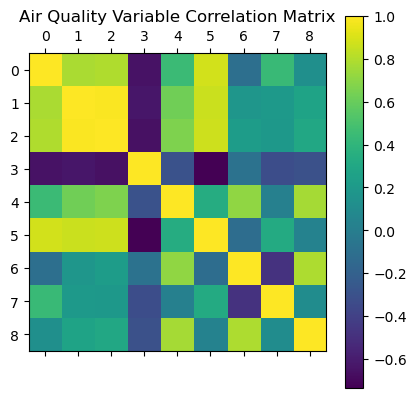

In [12]:
plt.matshow(daily_data.corr())
plt.title("Air Quality Variable Correlation Matrix")
plt.colorbar()
plt.show()

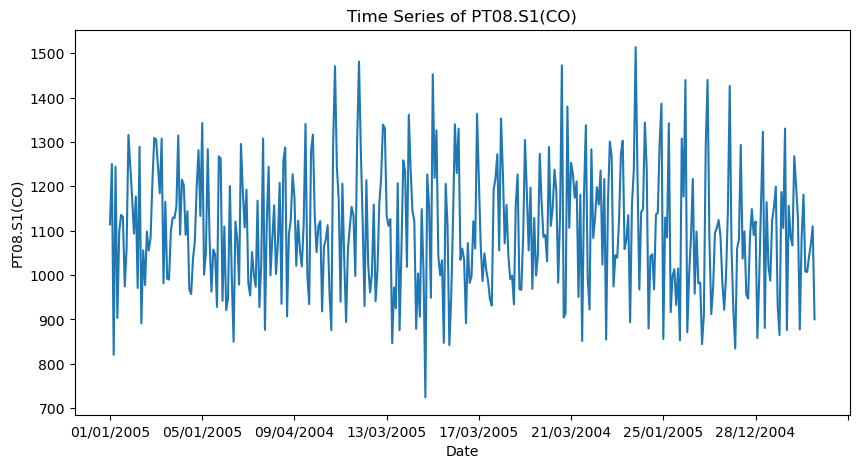

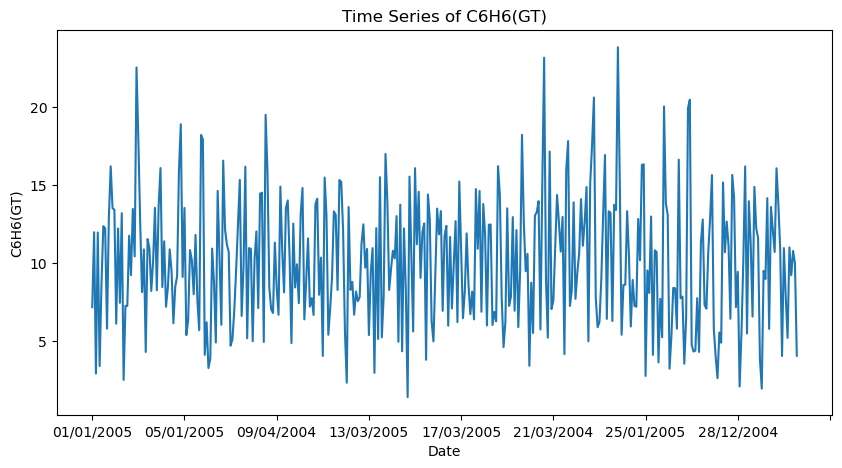

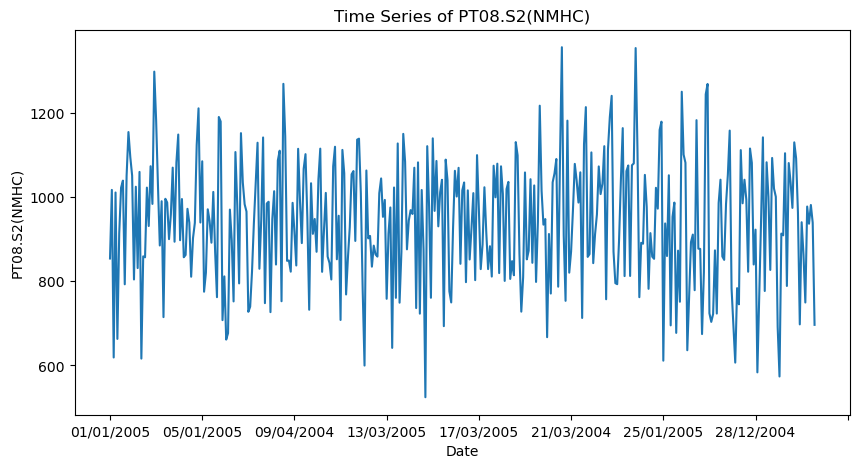

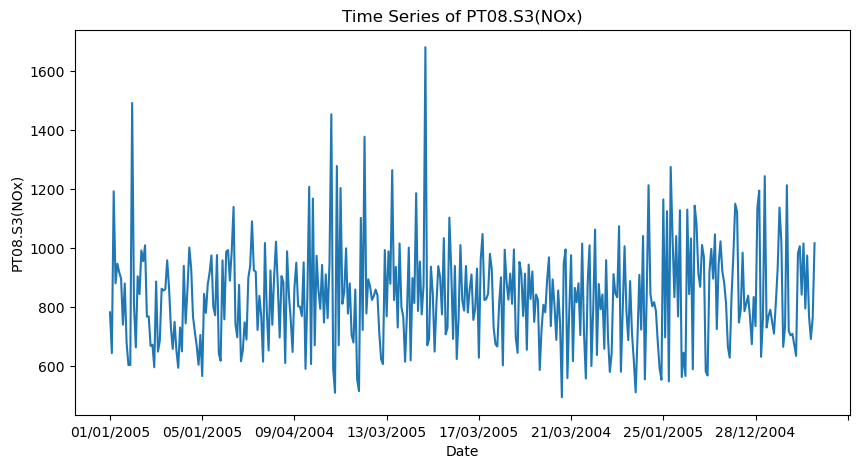

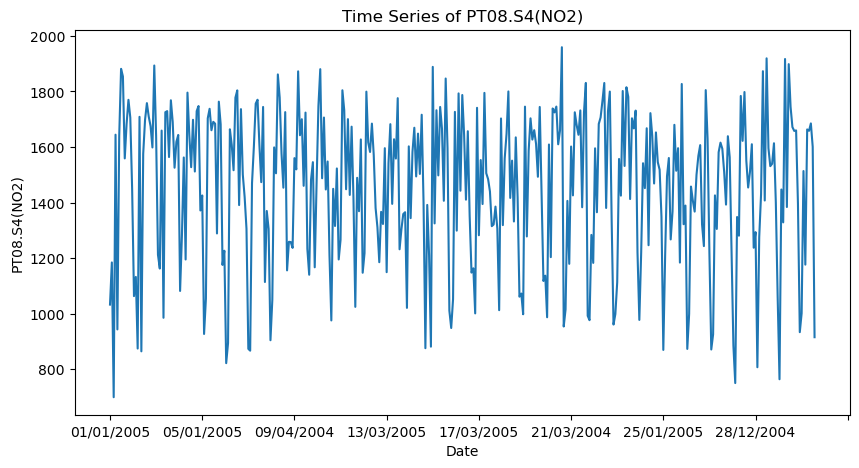

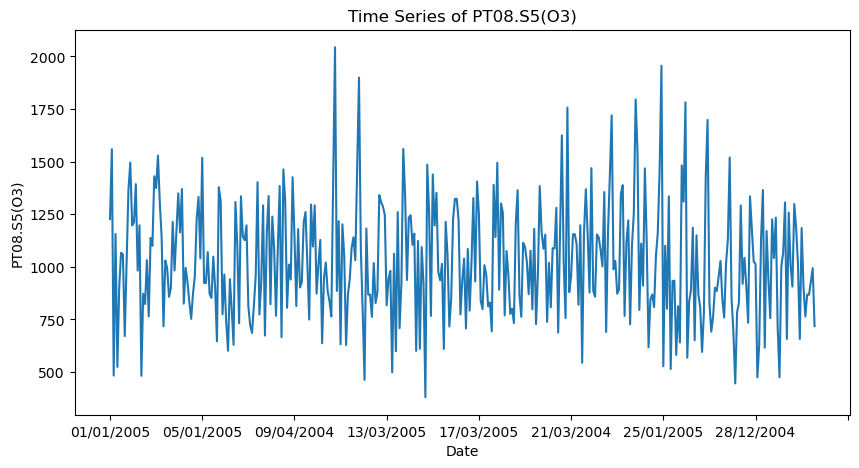

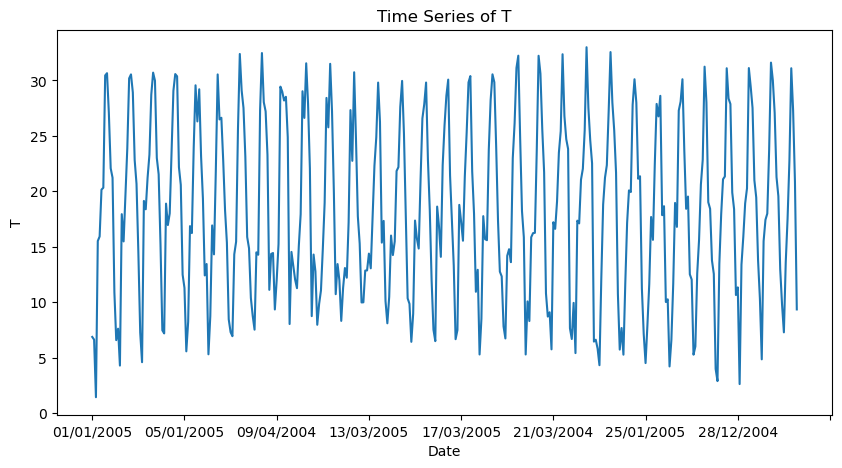

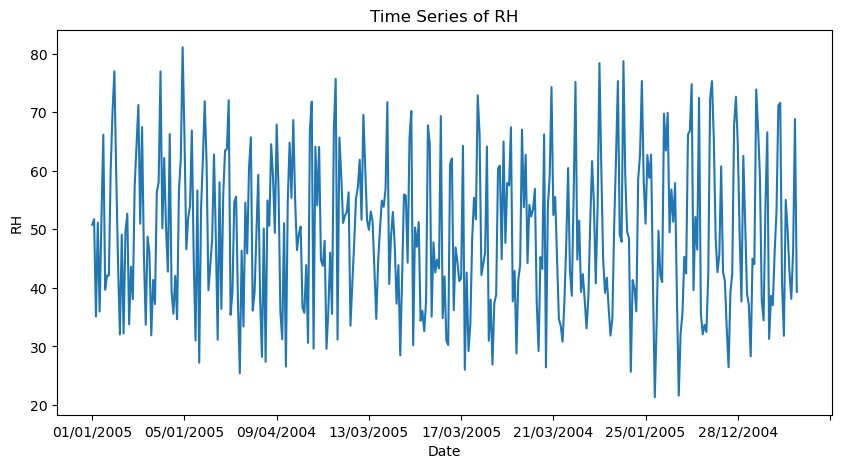

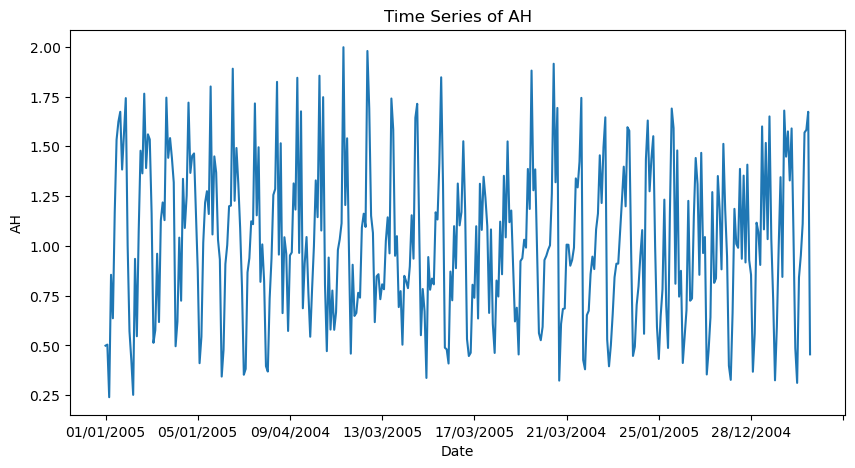

In [13]:
for col in daily_data.columns:
    plt.figure(figsize=(10, 5))
    daily_data[col].plot()
    plt.title(f"Time Series of {col}")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.show()
    